In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
import word2number 
from word2number import w2n

In [16]:
df = pd.read_csv("hiring.csv")
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [17]:
df.columns

Index(['experience', 'test_score(out of 10)', 'interview_score(out of 10)',
       'salary($)'],
      dtype='object')

In [18]:
df = df.rename(columns = {'test_score(out of 10)': 'test_score', 'interview_score(out of 10)':"interview_score",'salary($)': "salary"})

In [19]:
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [20]:
df["experience"].fillna("zero", inplace = True)

In [21]:
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [22]:
df["experience"] = df["experience"].apply(lambda x: w2n.word_to_num(x))

In [23]:
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [24]:
df["test_score"].fillna(df["test_score"].mean(), inplace = True)

In [25]:
df

,experience,test_score,interview_score,salary
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [26]:
model = LinearRegression()
model.fit(df[["experience", "test_score", "interview_score"]], df["salary"])

LinearRegression()

In [27]:
model.predict([[5,6,7]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([58231.95591138])

In [28]:
model.predict([[12,10,10]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92268.07227784])

In [38]:
predictions = model.predict(df[["experience", "test_score", "interview_score"]])

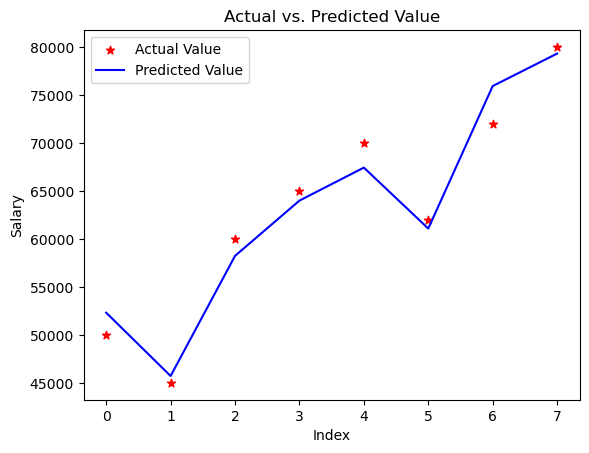

In [43]:

plt.scatter(df.index, df[["salary"]], color = "red", marker = "*", label = "Actual Value")
plt.plot(range(len(predictions)),predictions, color = "blue", label = "Predicted Value")
plt.xlabel("Index")
plt.ylabel("Salary")
plt.title("Actual vs. Predicted Value")
plt.legend()